In [1]:
import os
from time import time
from SIFTseg import *
import matplotlib.pyplot as plt
from matplotlib import path, patches

%matplotlib inline

In [2]:
segs = [] # it train a list of SIFT segmentor
root = '/home/hh162/Desktop/sift_segmentation/data/items_300/'
time_overall = 0
for cls in os.listdir(root):
    t1 = time()
    seg = siftSegment()
    seg.train(os.path.join(root, cls), [cls]) #add a arg [cls] which is a list of classes. it has 1 element in this case
    segs.append(seg)
    t2 = time()
    time_overall += (t2 -t1)
    print('detector for', cls, 'is trained in', t2-t1, 'sec')
    
print("The prediction takes", time_overall, "sec")

detector for Reynolds_Wrap is trained in 0.6700382232666016 sec
detector for Irish_Spring_Soap is trained in 0.7123777866363525 sec
detector for Marbles is trained in 0.9232394695281982 sec
detector for Crayons is trained in 0.4518308639526367 sec
detector for Hanes_Socks is trained in 0.7942295074462891 sec
detector for Tennis_Ball_Container is trained in 0.554379940032959 sec
detector for Ice_Cube_Tray is trained in 0.5053656101226807 sec
detector for Measuring_Spoons is trained in 0.3553798198699951 sec
detector for Epsom_Salts is trained in 0.5825116634368896 sec
detector for Burts_Bees_Baby_Wipes is trained in 0.5521094799041748 sec
detector for Black_Fashion_Gloves is trained in 0.5575933456420898 sec
detector for Hand_Weight is trained in 0.4485819339752197 sec
detector for Composition_Book is trained in 0.8046839237213135 sec
detector for Toilet_Brush is trained in 0.4094574451446533 sec
detector for Avery_Binder is trained in 0.40464210510253906 sec
detector for Speed_Stick is

['Reynolds_Wrap'] is found in 4.450809001922607 sec
['Irish_Spring_Soap'] is NOT found in 5.3432135581970215 sec
['Marbles'] is NOT found in 7.036346912384033 sec
['Crayons'] is NOT found in 4.2861387729644775 sec
['Hanes_Socks'] is NOT found in 5.125036001205444 sec
['Tennis_Ball_Container'] is NOT found in 4.482443809509277 sec
['Measuring_Spoons'] is NOT found in 3.610605239868164 sec
['Epsom_Salts'] is NOT found in 4.837213516235352 sec
['Burts_Bees_Baby_Wipes'] is NOT found in 3.978797435760498 sec
['Black_Fashion_Gloves'] is NOT found in 3.8103525638580322 sec
['Composition_Book'] is NOT found in 5.316840171813965 sec
['Toilet_Brush'] is NOT found in 3.4777309894561768 sec
['Avery_Binder'] is NOT found in 2.9605562686920166 sec
['Speed_Stick'] is NOT found in 4.312039852142334 sec
['Table_Cloth'] is NOT found in 4.444030284881592 sec
['Hinged_Ruled_Index_Cards'] is NOT found in 4.138874053955078 sec
['White_Facecloth'] is NOT found in 3.1998965740203857 sec
['Robots_DVD'] is NOT 

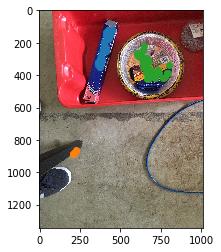

In [3]:
test = '/home/hh162/Desktop/sift_segmentation/data/test_1000/test1.jpg'
test_img = cv2.imread(test)
plt.imshow(test_img[:,:,::-1])
names = []
obj_exists = []
time_overall = 0
for seg in segs:
    t1 = time()
    objs = seg.predict(test_img)
    for obj in objs:
        t2 = time()
        time_overall += (t2 - t1)
        if obj.exists:
            obj_exists.append(obj)
            print(seg.classes[0], 'is found in', t2 -t1, 'sec')
            names.append(obj.name)
            pt_win = np.array(obj.pt_win)
            plt.scatter(pt_win[:,0], pt_win[:,1])
        else:
            print(seg.classes[0], 'is NOT found in', t2 -t1, 'sec')
print("The prediction takes", time_overall, "sec")